# EDA

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from data_dictionary import desc # descriptions for each column
import seaborn as sns

# maps
import geoplot as gplt
import geopandas as gpd
import geoplot.crs as gcrs

In [10]:
df = pd.read_csv("train1.csv")
df["issue_d"] = pd.to_datetime(df["issue_d"], format="%Y-%m-%d")
df["earliest_cr_line"] = pd.to_datetime(df["earliest_cr_line"], format="%Y-%m-%d")
df.shape

(16260, 62)

In [11]:
df.head()

,loan_amnt,emp_length,home_ownership,annual_inc,issue_d,loan_status,purpose,zip_code,addr_state,dti,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,profit
0,5300.0,< 1 year,RENT,34750.0,2012-12-01,Fully Paid,credit_card,959xx,CA,12.47,...,0.0,0.0,100.0,100.0,0.0,15900.0,12283.0,12100.0,0.0,1575.849997
1,9000.0,2 years,RENT,60000.0,2012-09-01,Fully Paid,credit_card,986xx,WA,22.44,...,0.0,5.0,97.0,50.0,0.0,94311.0,71192.0,8000.0,72511.0,307.923808
2,12000.0,10+ years,RENT,95000.0,2012-10-01,Fully Paid,debt_consolidation,900xx,CA,16.12,...,0.0,1.0,100.0,33.3,0.0,79780.0,47431.0,29100.0,44180.0,262.697370
3,5500.0,8 years,RENT,20000.0,2012-11-01,Fully Paid,medical,734xx,OK,27.00,...,0.0,7.0,100.0,75.0,0.0,20530.0,7069.0,7300.0,6430.0,1298.946425
4,6000.0,2 years,RENT,110000.0,2012-11-01,Charged Off,credit_card,346xx,FL,25.07,...,1.0,0.0,88.0,100.0,0.0,100804.0,65137.0,28800.0,66504.0,-3519.260000


In `Preprocessing 1.ipynb` we narrowed the number of columns from 151 down to 63. For our EDA it will help to group columns into categories and explore each category.

## Categorizing columns

In [4]:
df.columns.values

array(['loan_amnt', 'int_rate', 'installment', 'emp_length',
       'home_ownership', 'annual_inc', 'issue_d', 'loan_status',
       'purpose', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'fico_range_low', 'fico_range_high',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status',
       'mths_since_last_major_derog', 'tot_coll_amt', 'tot_cur_bal',
       'total_rev_hi_lim', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_

In [4]:
# Target for prediction -- string
target = ['loan_status']

# Loan related -- float, string, & datetime
loan_cols = ['loan_amnt', 'issue_d', 'purpose', 'initial_list_status']

# Customer related -- float & string
cust_cols = ['emp_length', 'home_ownership', 'annual_inc', 'zip_code', 'addr_state', 'dti']

# Credit related (basic credit info) -- float & datetime
cred_cols = ['earliest_cr_line', 'fico_range_low', 'fico_range_high']

# Delinquency related -- float
dlq_cols = ['delinq_2yrs', 'mths_since_last_delinq', 'pub_rec', 'mths_since_last_major_derog', 'tot_coll_amt', 
          'mths_since_recent_bc_dlq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_tl_120dpd_2m', 
          'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'pct_tl_nvr_dlq', 'pub_rec_bankruptcies']

# Inquiries related -- float
inq_cols = ['inq_last_6mths', 'mths_since_last_record', 'mths_since_recent_inq']

# Accounts related -- float
acc_cols = ['open_acc', 'total_acc', 'acc_open_past_24mths', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 
           'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'num_actv_bc_tl', 
           'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 
           'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_op_past_12m']

# Balance related -- float
bal_cols = ['revol_bal', 'revol_util', 'tot_cur_bal', 'total_rev_hi_lim', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 
           'percent_bc_gt_75', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit']

# check to make sure we covered them all
[x for x in df.columns if x not in target + loan_cols + cust_cols + cred_cols + dlq_cols + inq_cols + acc_cols + bal_cols]

['profit']

Since there are so many variables, we will explore `target`, `loan_cols`, `cust_cols`, and `cred_cols` in depth and spend less time on the others. We'll choose a few variables to focus on from the others.

## Target variable
We'll now explore `loan_status`.

Fully Paid     0.870234
Charged Off    0.129766
Name: loan_status, dtype: float64


<AxesSubplot:>

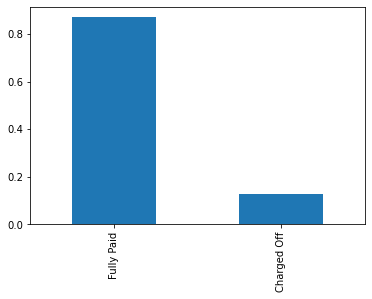

In [13]:
counts = df["loan_status"].value_counts(normalize=True)
print(counts)
counts.plot(kind="bar")

In [15]:
counts["Fully Paid"]/counts["Charged Off"]

6.706161137440759

We see 87% of loans were fully paid while 13% were charged off (a ratio of 6.7:1). This is seems like a relatively large charge off rate, although it is hard to compare with other data because charge off rates are more often defined as a ratio of dollar amounts rather than raw number of loans (e.g. https://www.federalreserve.gov/releases/chargeoff/about.htm).

We will need to consider class imbalance when modeling our data.

### Loan columns

In [55]:
[x + ": " + desc[x] for x in loan_cols]

['loan_amnt: The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.',
 'issue_d: The month which the loan was funded',
 'purpose: A category provided by the borrower for the loan request. ',
 'initial_list_status: The initial listing status of the loan. Possible values are – W, F']

In [115]:
df[loan_cols].head()

,loan_amnt,issue_d,purpose,initial_list_status
0,5300.0,2012-12-01,credit_card,w
1,9000.0,2012-09-01,credit_card,f
2,12000.0,2012-10-01,debt_consolidation,f
3,5500.0,2012-11-01,medical,w
4,6000.0,2012-11-01,credit_card,f


<AxesSubplot:ylabel='Frequency'>

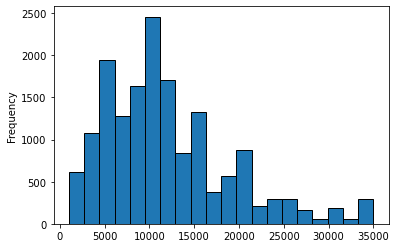

In [62]:
df["loan_amnt"].plot(kind="hist", bins=20, edgecolor="black")

In [63]:
df["loan_amnt"].describe()

count    16260.000000
mean     11883.673124
std       7064.807027
min       1000.000000
25%       6800.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

Loans range from \\$1,000 to \\$35,000 with a median of \\$10,000.

Text(0.5, 1.0, '')

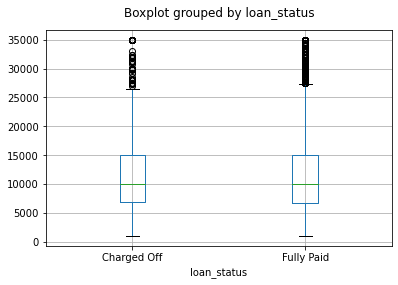

In [27]:
df[["loan_amnt","loan_status"]].boxplot(column="loan_amnt", by="loan_status")
plt.title("") # hide title

In [38]:
df[["loan_amnt","loan_status"]].groupby("loan_status").median()

,loan_amnt
loan_status,
Charged Off,10000.0
Fully Paid,10000.0


Loan amount seems to be similarly distributed across outcomes, suggesting that it might not be useful in modeling.

In [39]:
df.set_index("issue_d").groupby(pd.Grouper(freq="M")).size()/df.shape[0]

issue_d
2012-09-30    0.251169
2012-10-31    0.256089
2012-11-30    0.254059
2012-12-31    0.238684
Freq: M, dtype: float64

Recall that we limited our training data to reduce the missing value rates, so our origination window now only spans Sept. 2012 to Dec. 2012. The number of loans in each month is approximately even.

In [36]:
df[["issue_d","loan_status"]].set_index("issue_d").groupby(pd.Grouper(freq="M")).apply(lambda x: x.value_counts(normalize=True))

loan_status,Fully Paid,Charged Off
issue_d,,
2012-09-30,0.861166,0.138834
2012-10-31,0.872238,0.127762
2012-11-30,0.871218,0.128782
2012-12-31,0.876578,0.123422


It's hard to conclude much from only four time points, but in our sample it does not look like origination date is related to outcome.

<AxesSubplot:>

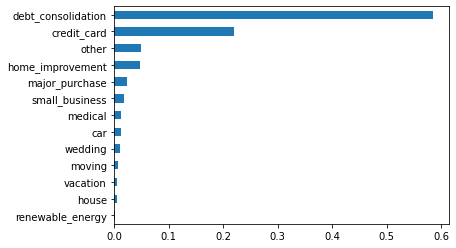

In [40]:
df["purpose"].value_counts(normalize=True, ascending=True).plot(kind="barh")

The majority (approx. 60%) of loans are for debt consolidation and over 20% are for credit cards. The remainding categories represent less than 20% of the data, and it may be worth merging these into a single category called "other".

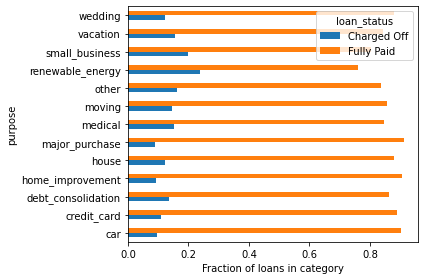

In [13]:
pt = pd.pivot_table(df[["purpose","loan_status"]], columns="loan_status", index="purpose", aggfunc = len)
(pt/pt.sum(axis=1).values.reshape(-1,1)).plot(kind="barh")
plt.xlabel("Fraction of loans in category")
plt.tight_layout()
plt.savefig("images/loan_purpose.png", )

Loans for debt consolidation have a higher charge off rate than loans for credit card purposes. Loans for renewable energy and small businesses have high charge off rates, presumably because the borrowers cause ends up failing, whereas loans for a major purchase or car half lower charge off rates.

We now investigate initial list status -- which can either be "f" for fractional (meaning multiple investors can get in on the loan) or "w" for whole (one lender must fund the whole loan).

<AxesSubplot:>

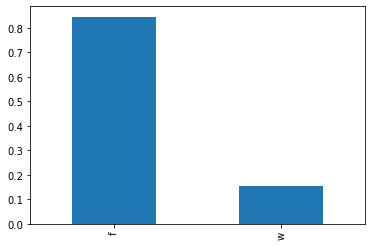

In [58]:
df["initial_list_status"].value_counts(normalize=True).plot(kind="bar")

Over 80% of loans are in the fractional market.

<AxesSubplot:xlabel='initial_list_status'>

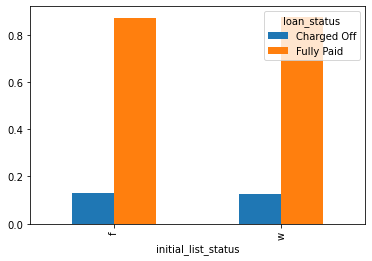

In [59]:
pt = pd.pivot_table(df[["initial_list_status","loan_status"]], columns="loan_status", index="initial_list_status", aggfunc = len)
(pt/pt.sum(axis=1).values.reshape(-1,1)).plot(kind="bar")

Loan outcome is fairly even across categories.

## Customer columns

In [60]:
[x + ": " + desc[x] for x in cust_cols]

['emp_length: Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. ',
 'home_ownership: The home ownership status provided by the borrower during registration\xa0or obtained from the credit report.\xa0Our values are: RENT, OWN, MORTGAGE, OTHER',
 'annual_inc: The self-reported annual income provided by the borrower during registration.',
 'zip_code: The first 3 numbers of the zip code provided by the borrower in the loan application.',
 'addr_state: The state provided by the borrower in the loan application',
 'dti: A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.']

In [61]:
df[cust_cols].head()

,emp_length,home_ownership,annual_inc,zip_code,addr_state,dti
0,< 1 year,RENT,34750.0,959xx,CA,12.47
1,2 years,RENT,60000.0,986xx,WA,22.44
2,10+ years,RENT,95000.0,900xx,CA,16.12
3,8 years,RENT,20000.0,734xx,OK,27.00
4,2 years,RENT,110000.0,346xx,FL,25.07


<AxesSubplot:>

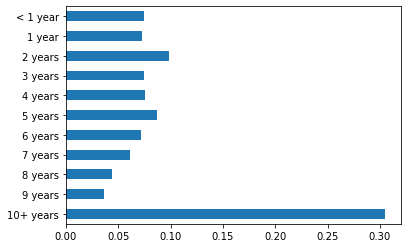

In [82]:
bar_order = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', 
             '8 years', '9 years', '10+ years'][::-1] # reorder indices

df["emp_length"].value_counts(normalize=True)[bar_order].plot(kind="barh")

Most borrowers have been employed for 10+ years. The remainding categories each represent only 5-10% of loans.

<AxesSubplot:ylabel='emp_length'>

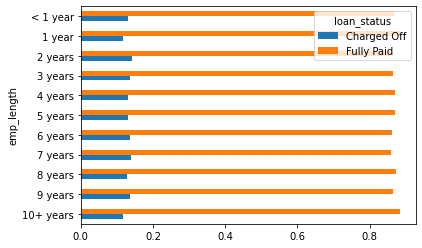

In [89]:
pt = pd.pivot_table(df[["emp_length","loan_status"]], columns="loan_status", index="emp_length", aggfunc = len)
(pt/pt.sum(axis=1).values.reshape(-1,1)).loc[bar_order].plot(kind="barh")

Interestingly, there aren't an patterns in loan outcome and employer length.

<AxesSubplot:>

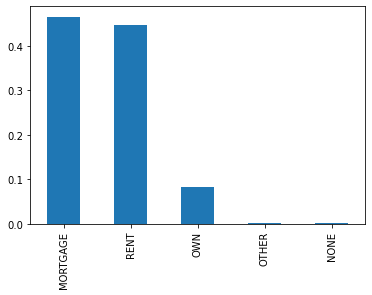

In [92]:
df["home_ownership"].value_counts(normalize=True).plot(kind="bar")

Only 10% of borrowers own a house. About 45% of borrowers have a mortgage, while another 45% rent their home.

<AxesSubplot:xlabel='home_ownership'>

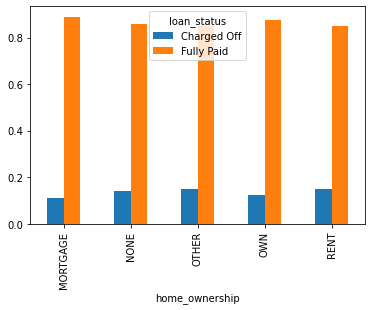

In [96]:
pt = pd.pivot_table(df[["home_ownership","loan_status"]], columns="loan_status", index="home_ownership", aggfunc = len)
(pt/pt.sum(axis=1).values.reshape(-1,1)).plot(kind="bar")

Renters appear slightly more likely to have a charge off status than mortgage holders or home owners.

In [125]:
df["annual_inc"].describe()

count    1.626000e+04
mean     6.802495e+04
std      7.159384e+04
min      7.200000e+03
25%      4.160079e+04
50%      5.800000e+04
75%      8.100000e+04
max      7.141778e+06
Name: annual_inc, dtype: float64

Annual incomes range from \\$7,200 to \\$7.1m.

In [102]:
df[["annual_inc","loan_status"]].groupby("loan_status").median()

,annual_inc
loan_status,
Charged Off,50000.0
Fully Paid,60000.0


The median annual income for charged off borrowers is about \\$10,000 lower than of fully paid borrowers.

In [103]:
path = gplt.datasets.get_path("contiguous_usa")
contiguous_usa = gpd.read_file(path)
contiguous_usa = contiguous_usa.sort_values("state").set_index("state")

# map state code --> state name
state_abbrevs = pd.read_csv("state_abbrevs.csv")
abbrev_map = {y:x for x,y in zip(state_abbrevs["State"], state_abbrevs["Code"])}

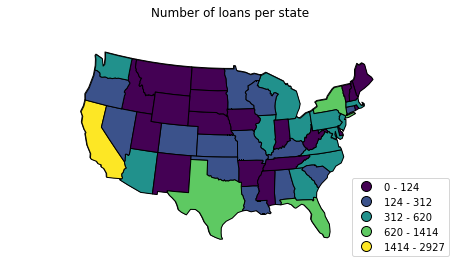

In [113]:
# group loans by PropertyState
data = df.groupby("addr_state").count()["loan_status"]
data = data.reindex(abbrev_map.keys(), fill_value=0)
data.name = "NumLoans"

# filter by contiguous states only for visualization
data_contiguous = data[data.index.isin(state_abbrevs["Code"])]
data_contiguous.index = data_contiguous.index.map(lambda x: abbrev_map[x])
contiguous_usa_join = contiguous_usa.join(data_contiguous, how="inner")

# plot
ax = gplt.polyplot(contiguous_usa_join, projection=gcrs.AlbersEqualArea())
gplt.choropleth(
  contiguous_usa_join,
  hue="NumLoans",
  edgecolor="black",
  linewidth=1,
  cmap="viridis",
  legend=True,
  legend_kwargs={"frameon":True, "loc":"lower right"},
  scheme="FisherJenks",
  projection=gcrs.AlbersEqualArea(),
  ax=ax
)
plt.title("Number of loans per state")
plt.show()

California has the most loans by far; however, this is not surprising considering their population. Let's tree to normalize by population to see if we can identify states which are borrowing "disproportionately" often.

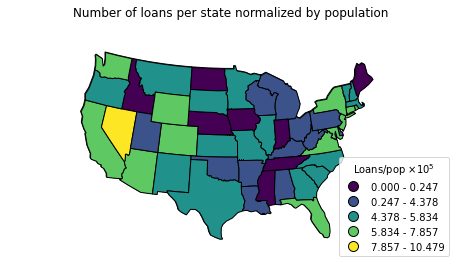

In [117]:
contiguous_usa_join["NormalizedNumLoans"] = contiguous_usa_join["NumLoans"].div(contiguous_usa_join["population"])

# plot
ax = gplt.polyplot(contiguous_usa_join, projection=gcrs.AlbersEqualArea())
gplt.choropleth(
  contiguous_usa_join,
  hue="NormalizedNumLoans",
  edgecolor="black",
  linewidth=1,
  cmap="viridis",
  legend=True,
  legend_kwargs={"frameon":True, "loc":"lower right"},
  scheme="FisherJenks",
  projection=gcrs.AlbersEqualArea(),
  ax=ax
)

# legend formatting
leg = ax.get_legend()
labels = leg.get_texts()
legend_scale = 5 # 10**2
for i in range(len(labels)):
    low, hi = map(float, labels[i].get_text().split(" - "))
    low, hi = np.round([low*10**legend_scale, hi*10**legend_scale], 3)
    labels[i].set_text( "%0.3f - %0.3f" % (low,hi))
leg.set_title(r"Loans/pop $\times 10^{%i}$" % legend_scale)
plt.title("Number of loans per state normalized by population")
plt.show()

Now we see that Nevada has a disproportionaly large number of borrowers. 

C:\Users\tysonp\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


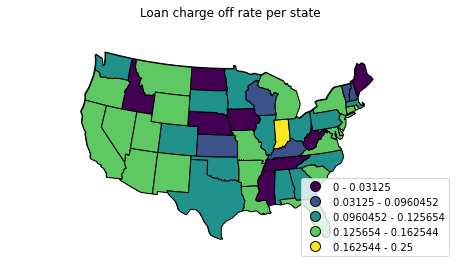

In [122]:
df_enc = df[["addr_state","loan_status"]]
df_enc["loan_status"] = df_enc["loan_status"].replace({"Charged Off":1, "Fully Paid":0})
data = df_enc.groupby("addr_state").mean()["loan_status"]
data = data.reindex(abbrev_map.keys(), fill_value=0)
data
data.name = "ChargeOff"

# filter by contiguous states only for visualization
data_contiguous = data[data.index.isin(state_abbrevs["Code"])]
data_contiguous.index = data_contiguous.index.map(lambda x: abbrev_map[x])
contiguous_usa_join = contiguous_usa.join(data_contiguous, how="inner")

# plot
ax = gplt.polyplot(contiguous_usa_join, projection=gcrs.AlbersEqualArea())
gplt.choropleth(
  contiguous_usa_join,
  hue="ChargeOff",
  edgecolor="black",
  linewidth=1,
  cmap="viridis",
  legend=True,
  legend_kwargs={"frameon":True, "loc":"lower right"},
  scheme="FisherJenks",
  projection=gcrs.AlbersEqualArea(),
  ax=ax
)
plt.title("Loan charge off rate per state")
plt.show()

States in the western U.S. have high charge off rates -- which is bad considering they also have the highest number of loans. Indiana has an extremely high charge off rate.

<AxesSubplot:ylabel='Frequency'>

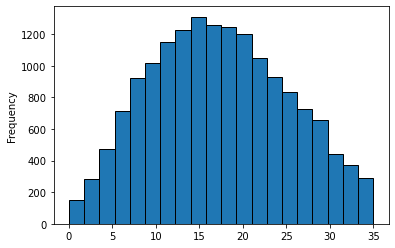

In [128]:
df["dti"].plot(kind="hist", bins=20, edgecolor="black")

DTI has a symmetric, unimodal distributed peaked around 15%.

In [132]:
df[["dti","loan_status"]].groupby("loan_status").median()

,dti
loan_status,
Charged Off,18.465
Fully Paid,16.700


Borrowers that fully pay their loans have a lower DTI than borrowers that end up charged off.

## Credit columns

In [138]:
df[cred_cols].head()

,earliest_cr_line,fico_range_low,fico_range_high
0,2004-05-01,665.0,669.0
1,1999-09-01,660.0,664.0
2,1996-12-01,715.0,719.0
3,2005-01-01,675.0,679.0
4,1998-05-01,675.0,679.0


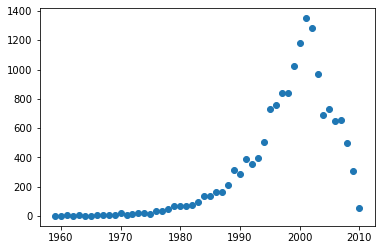

In [150]:
data = df[cred_cols].set_index("earliest_cr_line").groupby(pd.Grouper(freq="Y")).size() # earliest credit line

dates = mdates.date2num(data.index.values)
plt.plot_date(dates, data.values)

Most people had a credit line as early as 2000 (12 years before loan origination).

C:\Users\tysonp\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


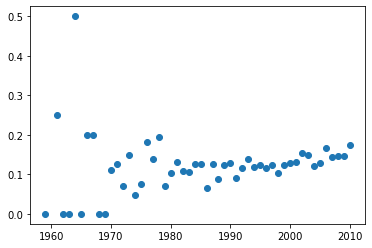

In [151]:
df_enc = df[["earliest_cr_line","loan_status"]]
df_enc["loan_status"] = df_enc["loan_status"].replace({"Charged Off":1, "Fully Paid":0})
data = df_enc[["earliest_cr_line","loan_status"]].set_index("earliest_cr_line").groupby(pd.Grouper(freq="Y")).mean()

dates = mdates.date2num(data.index.values)
plt.plot_date(dates, data.values)

Generally borrowers with shorter credit histories have higher charge off rates. We 

In [152]:
print(df[["fico_range_high","fico_range_low"]].corr())
(df["fico_range_high"] - df["fico_range_low"]).describe()

                 fico_range_high  fico_range_low
fico_range_high              1.0             1.0
fico_range_low               1.0             1.0


count    16260.000000
mean         4.000123
std          0.011090
min          4.000000
25%          4.000000
50%          4.000000
75%          4.000000
max          5.000000
dtype: float64

`fico_range_high` is essentially always 4 points higher than `fico_range_low`. Because of this, we should drop one column.

<AxesSubplot:ylabel='Frequency'>

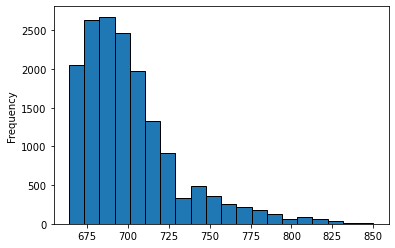

In [155]:
df["fico_range_high"].plot(kind="hist", bins=20, edgecolor="black")

Text(0.5, 1.0, '')

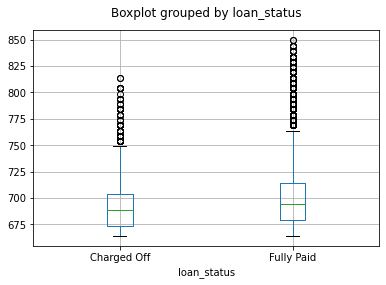

In [153]:
df[["fico_range_high","loan_status"]].boxplot(column="fico_range_high", by="loan_status")
plt.title("") # hide title

As we should expect, better credit score is associated with better loan outcome.

## Delinquency columns

In [156]:
[x + ": " + desc[x] for x in dlq_cols]

["delinq_2yrs: The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years",
 "mths_since_last_delinq: The number of months since the borrower's last delinquency.",
 'pub_rec: Number of derogatory public records',
 'mths_since_last_major_derog: Months since most recent 90-day or worse rating',
 'tot_coll_amt: Total collection amounts ever owed',
 'mths_since_recent_bc_dlq: Months since most recent bankcard delinquency',
 'mths_since_recent_revol_delinq: Months since most recent revolving delinquency.',
 'num_accts_ever_120_pd: Number of accounts ever 120 or more days past due',
 'num_tl_120dpd_2m: Number of accounts currently 120 days past due (updated in past 2 months)',
 'num_tl_30dpd: Number of accounts currently 30 days past due (updated in past 2 months)',
 'num_tl_90g_dpd_24m: Number of accounts 90 or more days past due in last 24 months',
 'pct_tl_nvr_dlq: Percent of trades never delinquent',
 'pub_rec_bankruptcies: Number of publ

<AxesSubplot:>

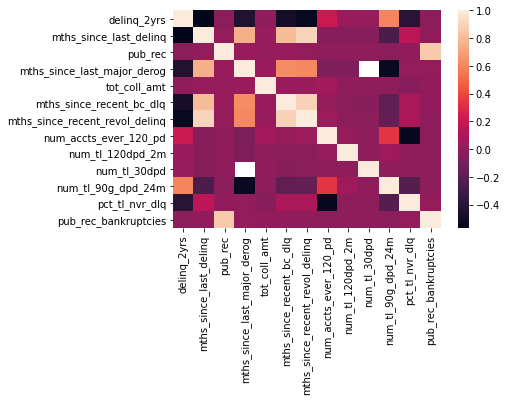

In [163]:
sns.heatmap(df[dlq_cols].corr())

Interestingly, these columns are not as correlated as I thought they would be. Perhaps people learn from their financial mistakes/try to avoid being delinquent on multiple loans. We do see some high correlations like `pub_rec` and `pub_rec_bankruptcies`, we'll need to deal with these when modeling.

Let's look at one delinquency-related column.

In [176]:
counts = df["delinq_2yrs"].value_counts(normalize=True)
counts

0.0     0.831919
1.0     0.120172
2.0     0.032288
3.0     0.008426
4.0     0.003444
5.0     0.001722
7.0     0.000615
6.0     0.000615
9.0     0.000246
8.0     0.000185
11.0    0.000062
18.0    0.000062
13.0    0.000062
12.0    0.000062
14.0    0.000062
10.0    0.000062
Name: delinq_2yrs, dtype: float64

One borrower has 18 delinquencies in the last 2 years!

<AxesSubplot:>

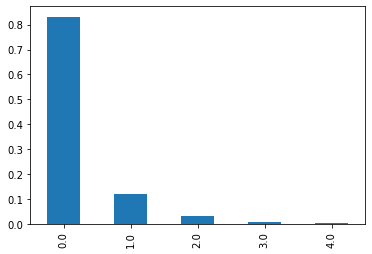

In [177]:
counts[:4].plot(kind="bar")

In [181]:
df[["delinq_2yrs","loan_status"]].groupby("loan_status").mean()

,delinq_2yrs
loan_status,
Charged Off,0.241706
Fully Paid,0.249965


There does not seem to be much of a relationship between `delinq_2yrs` and `loan_status`, and in fact fully paid loans have a slightly higher 2-year delinquency rate here.

## Inquiries columns

In [183]:
[x + ": " + desc[x] for x in inq_cols]

['inq_last_6mths: The number of inquiries in past 6 months (excluding auto and mortgage inquiries)',
 'mths_since_last_record: The number of months since the last public record.',
 'mths_since_recent_inq: Months since most recent inquiry.']

<AxesSubplot:ylabel='Frequency'>

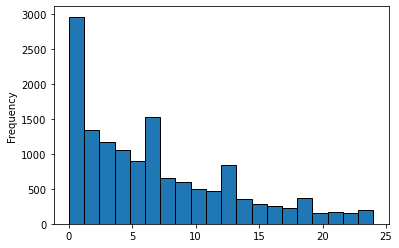

In [187]:
df["mths_since_recent_inq"].plot(kind="hist", bins=20, edgecolor="black")

In [193]:
df[["mths_since_recent_inq","loan_status"]].groupby("loan_status").median()

,mths_since_recent_inq
loan_status,
Charged Off,4.0
Fully Paid,5.0


Charged off loans are associated with a slightly more recent inquiry.

## Account columns

In [188]:
[x + ": " + desc[x] for x in acc_cols]

["open_acc: The number of open credit lines in the borrower's credit file.",
 "total_acc: The total number of credit lines currently in the borrower's credit file",
 'acc_open_past_24mths: Number of trades opened in past 24 months.',
 'mo_sin_old_il_acct: Months since oldest bank installment account opened',
 'mo_sin_old_rev_tl_op: Months since oldest revolving account opened',
 'mo_sin_rcnt_rev_tl_op: Months since most recent revolving account opened',
 'mo_sin_rcnt_tl: Months since most recent account opened',
 'mort_acc: Number of mortgage accounts.',
 'mths_since_recent_bc: Months since most recent bankcard account opened.',
 'num_actv_bc_tl: Number of currently active bankcard accounts',
 'num_actv_rev_tl: Number of currently active revolving trades',
 'num_bc_sats: Number of satisfactory bankcard accounts',
 'num_bc_tl: Number of bankcard accounts',
 'num_il_tl: Number of installment accounts',
 'num_op_rev_tl: Number of open revolving accounts',
 'num_rev_accts: Number of revolv

<AxesSubplot:>

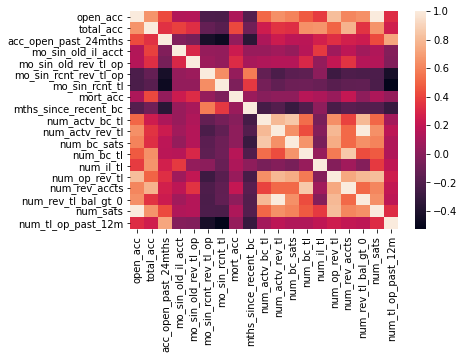

In [189]:
sns.heatmap(df[acc_cols].corr())

Several of these are highly correlated (positively or negatively). Let's look at `mo_sin_rcnt_tl`.

In [198]:
df["mo_sin_rcnt_tl"].describe()

count    16211.000000
mean         8.859725
std          9.832141
min          0.000000
25%          3.000000
50%          6.000000
75%         11.000000
max        137.000000
Name: mo_sin_rcnt_tl, dtype: float64

The distribution is highly skewed right, with some borrowers having their most recent account opened 137 months ago (11 years). The median value is 6 months.

In [199]:
df[["mo_sin_rcnt_tl","loan_status"]].groupby("loan_status").median()

,mo_sin_rcnt_tl
loan_status,
Charged Off,5.0
Fully Paid,6.0


## Balance columns
We'll just look at the correlations here.

In [200]:
[x + ": " + desc[x] for x in bal_cols]

['revol_bal: Total credit revolving balance',
 'revol_util: Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.',
 'tot_cur_bal: Total current balance of all accounts',
 'total_rev_hi_lim: Total revolving high credit/credit limit',
 'avg_cur_bal: Average current balance of all accounts',
 'bc_open_to_buy: Total open to buy on revolving bankcards.',
 'bc_util: Ratio of total current balance to high credit/credit limit for all bankcard accounts.',
 'percent_bc_gt_75: Percentage of all bankcard accounts > 75% of limit.',
 'tot_hi_cred_lim: Total high credit/credit limit',
 'total_bal_ex_mort: Total credit balance excluding mortgage',
 'total_bc_limit: Total bankcard high credit/credit limit',
 'total_il_high_credit_limit: Total installment high credit/credit limit']

<AxesSubplot:>

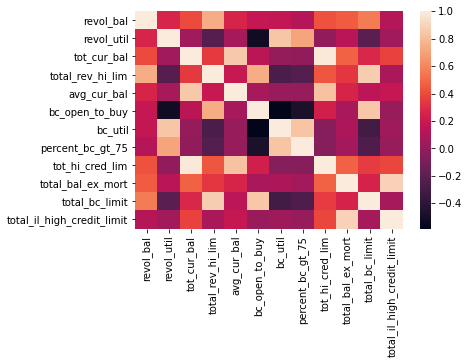

In [201]:
sns.heatmap(df[bal_cols].corr())

Again there are several highly correlated columns that we'll need to deal with.

## Data types

In [7]:
df.dtypes.value_counts()

float64           54
object             7
datetime64[ns]     2
dtype: int64

In [20]:
df[df.columns[df.dtypes=="object"]]

,emp_length,home_ownership,loan_status,purpose,zip_code,addr_state,initial_list_status
0,< 1 year,RENT,Fully Paid,credit_card,959xx,CA,w
1,2 years,RENT,Fully Paid,credit_card,986xx,WA,f
2,10+ years,RENT,Fully Paid,debt_consolidation,900xx,CA,f
3,8 years,RENT,Fully Paid,medical,734xx,OK,w
4,2 years,RENT,Charged Off,credit_card,346xx,FL,f
...,...,...,...,...,...,...,...
16255,5 years,RENT,Fully Paid,debt_consolidation,981xx,WA,f
16256,10+ years,OWN,Fully Paid,debt_consolidation,011xx,MA,f
16257,6 years,OWN,Fully Paid,home_improvement,797xx,TX,f
16258,1 year,RENT,Fully Paid,credit_card,112xx,NY,f


## Missing values

In [15]:
missing = df.isna().mean().sort_values(ascending=False)
missing[missing > 0]

mths_since_last_record            0.974600
mths_since_last_major_derog       0.788007
mths_since_recent_bc_dlq          0.736470
mths_since_recent_revol_delinq    0.652829
mths_since_last_delinq            0.509041
mths_since_recent_inq             0.129951
mo_sin_old_il_acct                0.054428
emp_length                        0.043419
bc_util                           0.010394
bc_open_to_buy                    0.009779
percent_bc_gt_75                  0.009779
mths_since_recent_bc              0.008241
mo_sin_old_rev_tl_op              0.003075
mo_sin_rcnt_rev_tl_op             0.003075
num_accts_ever_120_pd             0.003014
avg_cur_bal                       0.003014
tot_cur_bal                       0.003014
mo_sin_rcnt_tl                    0.003014
tot_coll_amt                      0.003014
total_il_high_credit_limit        0.003014
total_rev_hi_lim                  0.003014
num_actv_bc_tl                    0.003014
num_tl_90g_dpd_24m                0.003014
tot_hi_cred

## Future work
A bivariate analysis (looking at pairs of variables) would be a good addition to our analysis. We did look at how several variables related to loan outcome, and we looked at correlations between some numeric variables, but there is still a lot to be done here. Does loan purpose relate to previous account delinquencies? By studying `earliest_cr_line`, `delinq_2yrs`, and `loan_status` can we determine an acceptable ratio for the number of delinquencies to credit history length? That is, how does someone with a 10 year credit history and 5 delinquencies in 2 years compare to someone with a 5 year credit history and 3 delinquencies? Do geographical delinquency/charge-off rates remain relatively constant or do they change rapidly in time?